In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('max_columns',500)
pd.set_option('max_rows',500)

In [3]:
#read the file
df_test = pd.read_csv('test.csv', encoding='utf-8')
df_train = pd.read_csv('train.csv')

In [4]:
#size of the file
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#수치형 변수
numerical_features = df_train.dtypes[df_train.dtypes != "object"].index
#범주형 변수
categorical_features = df_train.dtypes[df_train.dtypes == "object"].index
print("numerical features : ", len(numerical_features))
print("categorical features : ", len(categorical_features))

numerical features :  38
categorical features :  43


In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


- 왜도 : 분포의 비대칭도를 나타내는 통계량 <br>
(자료의 대칭성을 알아보는 측도)
- 첨도 : 분포의 꼬리부분의 길이와 중앙부분의 뾰족함에 대한 정보를 제공하는 통계량 <br>
(정규분포 대비 봉오리의 높이를 알아보는 측도)

In [11]:
print('Skewness : %f' % df_train['SalePrice'].skew())  
print('Kurtosis : %f' % df_train['SalePrice'].kurt())  

Skewness : 1.882876
Kurtosis : 6.536282


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

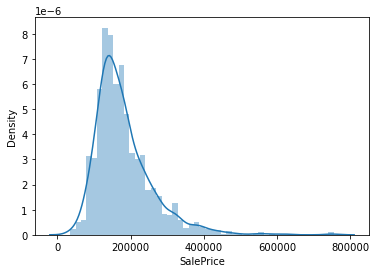

In [15]:
ax = plt.subplots() 
sns.distplot(df_train['SalePrice'])

In [16]:
df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

In [17]:
np.log(df_train['SalePrice'])   #np.log1p(df_train['SalePrice'])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [18]:
#saleprice를 로그값으로 변환
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [19]:
df_train['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [20]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


## 탐색적 데이터 분석(EDA)

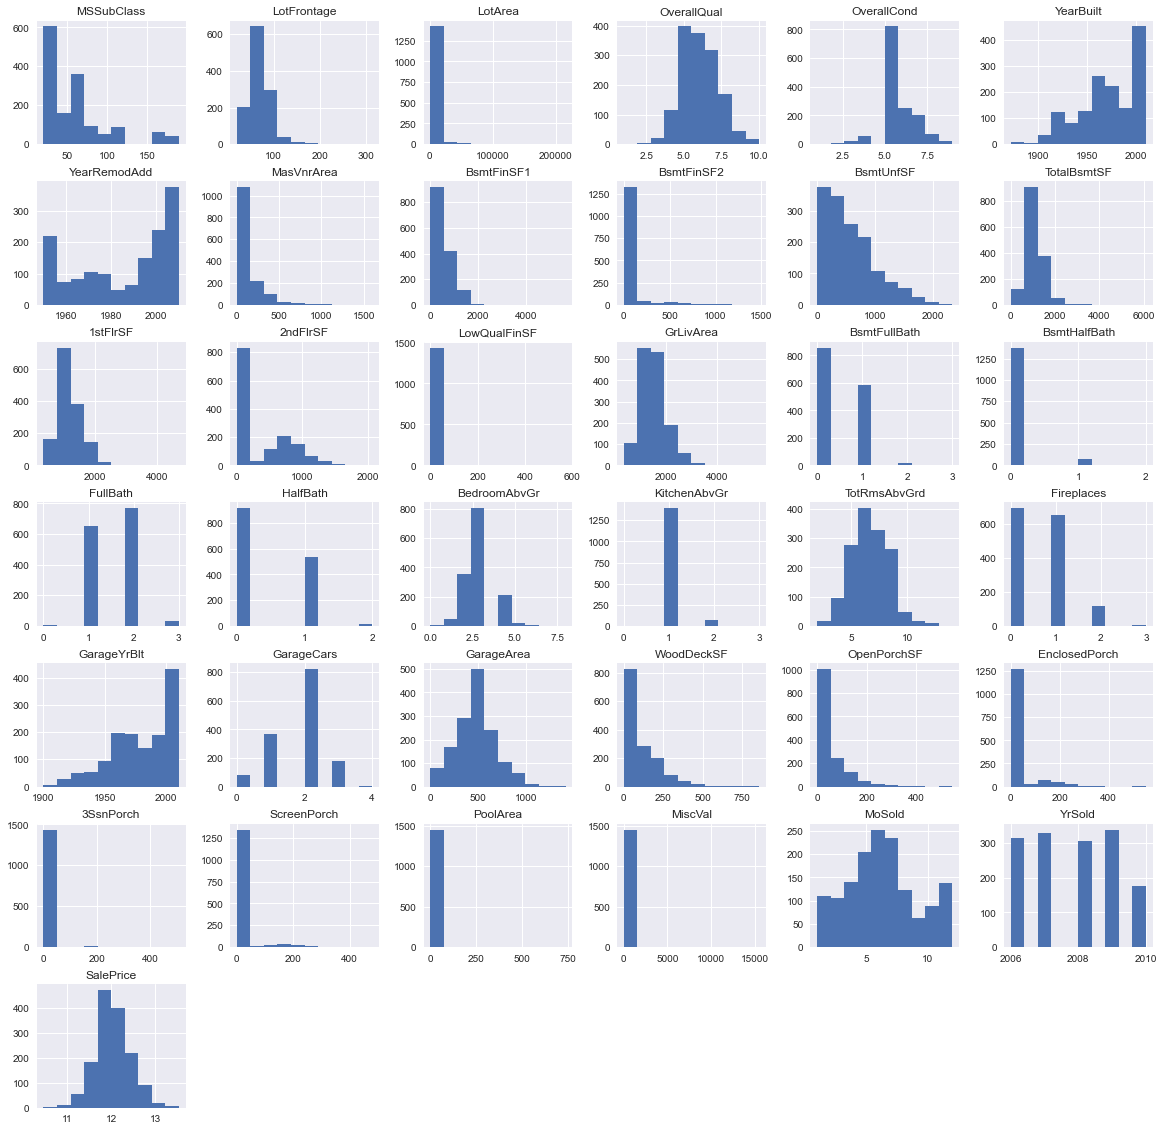

In [21]:
#연속형 변수의 데이터 분포를 이해하기위한 히스토그램
plt.style.use('seaborn')
cont_cols_train = df_train.dtypes[df_train.dtypes != 'object'].index
df_train[cont_cols_train].hist(figsize=(20,20))
plt.show()

위의 그래프들을 보면,
규모가 매우 광범위해서 데이터를 표준화할 필요가 있다.

YearBuilt, GarageYrBlt 와 같은 값들은 한쪽으로 치우쳐있으며, 최근에 설립되었다. 이러한 이유로 변수에 ourliers들을 체크하고 검사할 필요가 없다.
EnclosedPorch, OpenPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal 와 같이 값들이 0에 가까우면 SalePrice를 결정하는 데 중요한 의미이다.

변수들을 삭제하기 전에 변수들의 값과 상관관계를 봐야한다.

In [22]:
# 한 쪽으로 치우쳐진 히스토그램을 모은 리스트
list1=['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

desc1 = df_train[list1].describe().T
# 변동 계수
desc1['coef_of_var'] = desc1['std'] / desc1['mean']

In [23]:
desc1

,count,mean,std,min,25%,50%,75%,max,coef_of_var
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0,0.949076
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.00,1600.0,1.746306
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0,1.028082
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.0,0.00,1474.0,3.465556
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.0,477.5,808.00,2336.0,0.778977
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.0,0.0,0.00,572.0,8.319430
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.0,0.0,0.00,2.0,4.149748
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.0,0.0,168.00,857.0,1.329932
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.0,25.0,68.00,547.0,1.419967
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.0,0.0,0.00,552.0,2.783950


- 변동 계수 : CV는 표준편차를 평균으로 나눈 것이며, 두 그룹에서 가지고 있는 데이터의 흩어진 정도를 비교하는 경우에 사용합니다.<br>
변동계수가 작은 그룹의 데이터가 더 안정적이라고 볼 수 있습니다.


In [24]:
desc1[desc1['coef_of_var'] > 3].T.columns    #desc1[desc1['coef_of_var'] > 3].index

Index(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [25]:
#변동계수는 흩어진 정도를 비교하는 것으로 3보다 큰 속성을 삭제하기
drop_col = desc1[desc1['coef_of_var'] > 3].T.columns  

df_train.drop(drop_col, axis=1, inplace=True)  #7개 삭제
df_test.drop(drop_col, axis=1, inplace=True)   #7개 삭제

In [26]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,NaN,NaN,NaN,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,NaN,NaN,NaN,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,NaN,NaN,NaN,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,NaN,NaN,NaN,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,NaN,NaN,NaN,12,2008,WD,Normal,12.429216


In [27]:
#train의 칼럼별 결측값 개수 구하기 : df_train[i].isnull().sum()
for i in df_train.columns : 
    if df_train[i].isnull().sum() > 0 :
        if df_train[i].dtypes == 'object' : 
            print(i, "total null : ",df_train[i].isnull().sum())

Alley total null :  1369
MasVnrType total null :  8
BsmtQual total null :  37
BsmtCond total null :  37
BsmtExposure total null :  38
BsmtFinType1 total null :  37
BsmtFinType2 total null :  38
Electrical total null :  1
FireplaceQu total null :  690
GarageType total null :  81
GarageFinish total null :  81
GarageQual total null :  81
GarageCond total null :  81
PoolQC total null :  1453
Fence total null :  1179
MiscFeature total null :  1406


In [28]:
#test의 칼럼별 결측값 개수 구하기 : df_test[i].isnull().sum()
for i in df_test.columns : 
    if df_test[i].isnull().sum() > 0 :
        if df_test[i].dtypes == 'object' : 
            print(i, "total null : ",df_test[i].isnull().sum())

MSZoning total null :  4
Alley total null :  1352
Utilities total null :  2
Exterior1st total null :  1
Exterior2nd total null :  1
MasVnrType total null :  16
BsmtQual total null :  44
BsmtCond total null :  45
BsmtExposure total null :  44
BsmtFinType1 total null :  42
BsmtFinType2 total null :  42
KitchenQual total null :  1
Functional total null :  2
FireplaceQu total null :  730
GarageType total null :  76
GarageFinish total null :  78
GarageQual total null :  78
GarageCond total null :  78
PoolQC total null :  1456
Fence total null :  1169
MiscFeature total null :  1408
SaleType total null :  1


In [30]:
cat_col = df_train.dtypes[df_train.dtypes == "object"].index

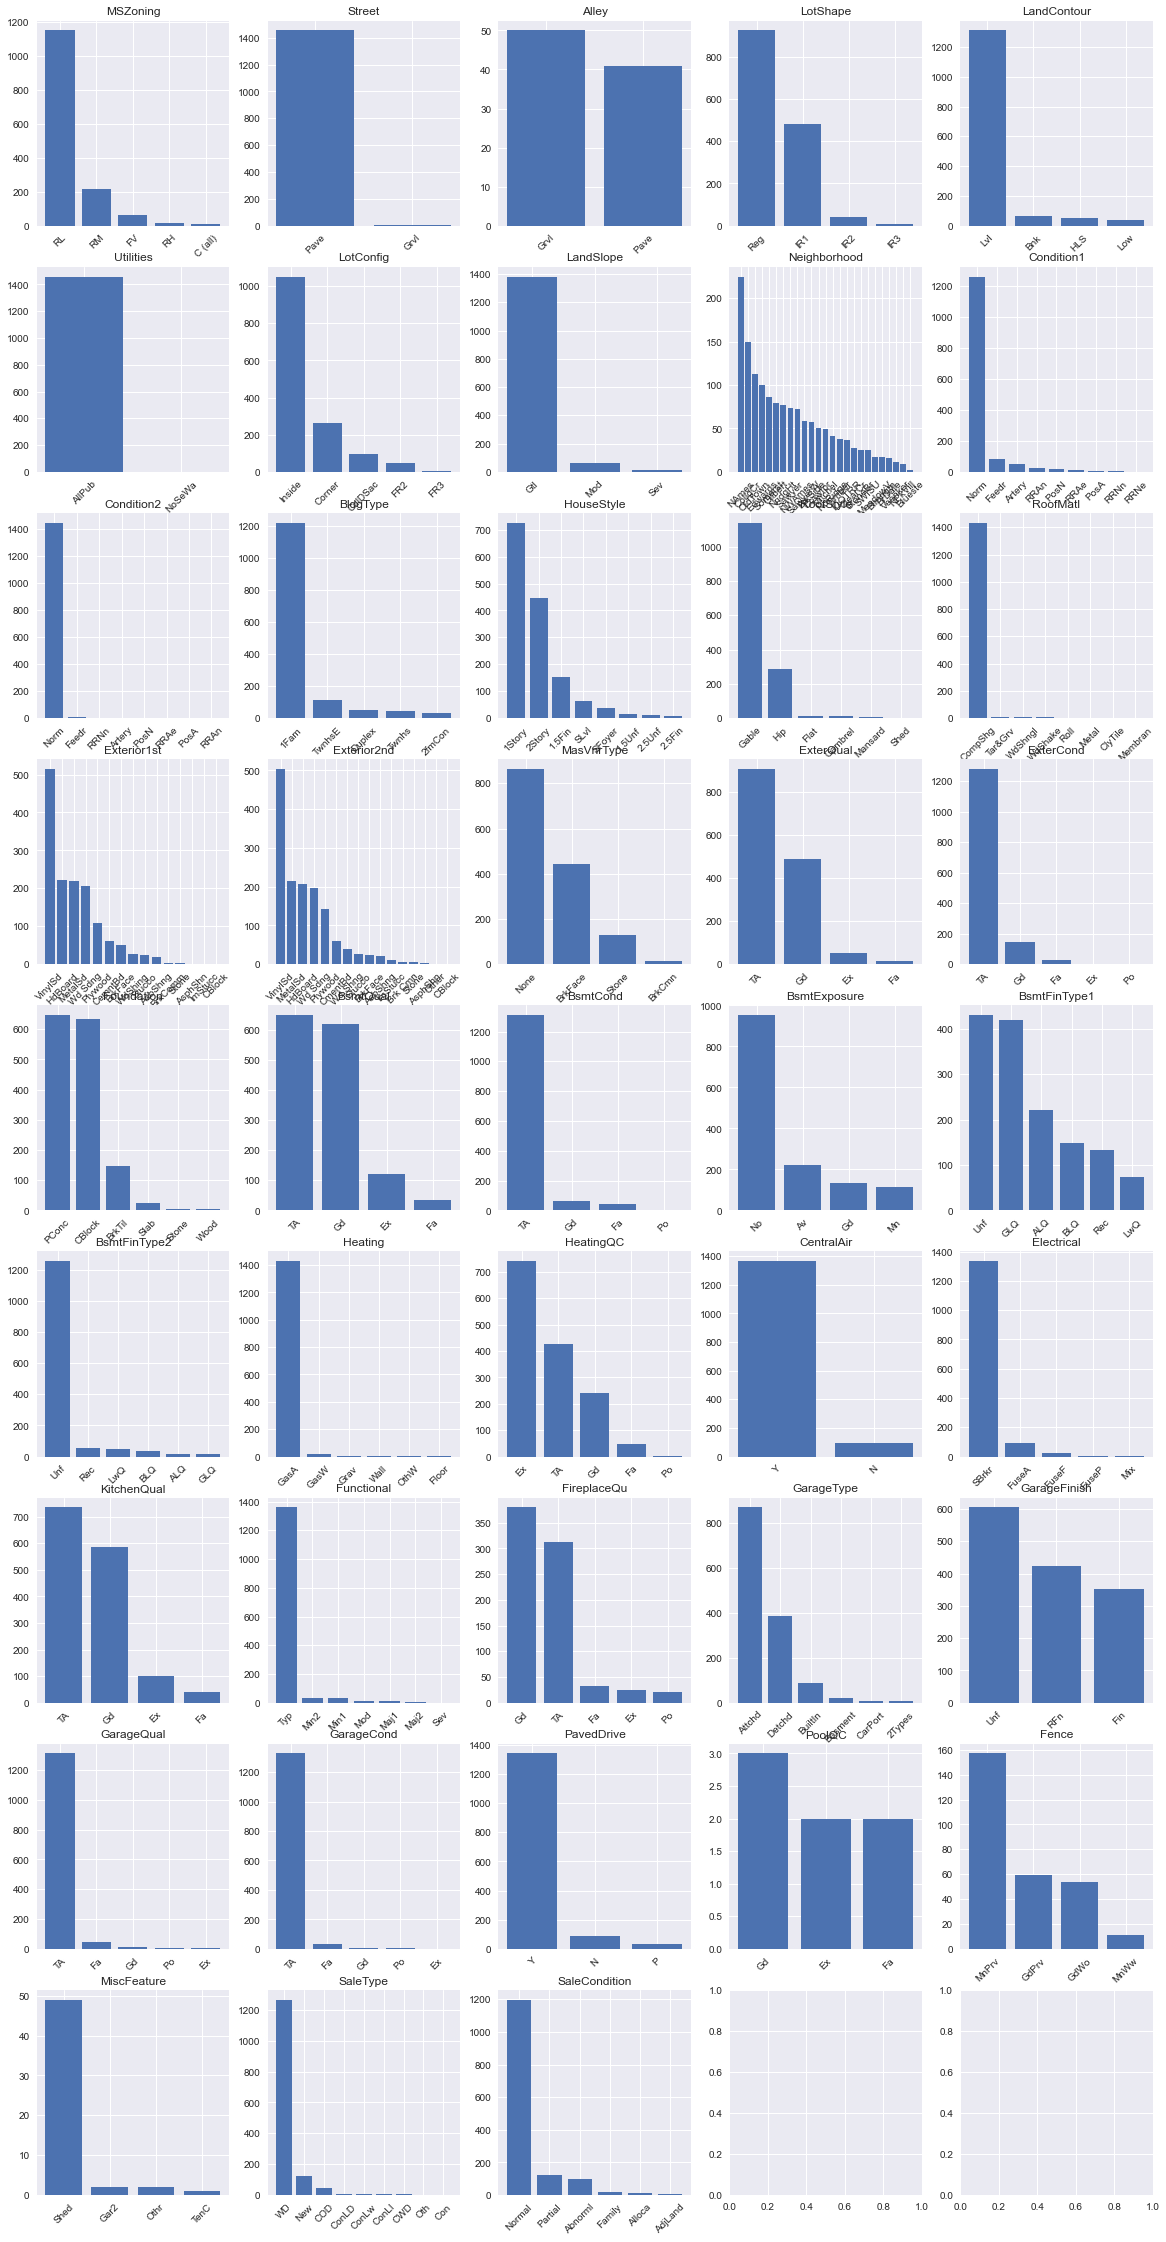

In [31]:
#categorical variables를 확인하기 위한 막대 그래프(barplot)
f, axe = plt.subplots(9,5, figsize=(20,40))

for ax, col in zip(axe.ravel(), cat_col) : 
    y = df_train[col].value_counts()
    ax.bar(y.index, y)
    ax.set_title(col)
    #plt.xticks(rotation=45)
    #ax.set_xticklabels()
    for t in ax.get_xticklabels() :
        t.set_rotation(45)  #45도로 회전

앞도적으로 40%보다 높은 결측값을 가지고 있는 변수 확인한다.

In [32]:
df_train['Alley'].isnull().sum()*100, df_train['SalePrice'].count()

(136900, 1460)

In [37]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [38]:
for i in df_train.columns : 
    if df_train[i].dtypes == "object" : 
        if df_train[i].isnull().sum() > 0:
            missing_per = round(df_train[i].isnull().sum() * 100/df_train['SalePrice'].count(), 1)
            if missing_per > 40 : 
                print(i)
                print(df_train[i].value_counts())
                print("null values : ", df_train[i].isnull().sum())
                print("null values as %  : ", round(df_train[i].isnull().sum() * 100/df_train['SalePrice'].count() , 1))
                print()

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
null values :  1369
null values as %  :  93.8

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
null values :  690
null values as %  :  47.3

PoolQC
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
null values :  1453
null values as %  :  99.5

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
null values :  1179
null values as %  :  80.8

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
null values :  1406
null values as %  :  96.3



- house에 필요없는 속성 값들을 삭제
- 비어있는 값들을 가지고 있는 속성 값들을 삭제<br>

여기서 'PoolQC'를 제외하고 Not Applicable인 결측값들은 Pool에 이용 가능하다. 그래서 PoolQC를 삭제한다.

In [39]:
df_train.drop('PoolQC', axis=1, inplace=True)
df_test.drop('PoolQC', axis=1, inplace=True)

In [40]:
#그리고 나머지 'Alley','FireplaceQu','Fence','MiscFeature'는 결측값에 Not Applicable로 채워넣어준다. 
list2 = ['Alley','FireplaceQu','Fence','MiscFeature']
for i in list2 :
    df_train[i].fillna('Not Applicable', inplace=True)
    df_test[i].fillna('Not Applicable', inplace=True)

In [41]:
df_train['GarageCond'].value_counts().index[0]

'TA'

In [42]:
cat_col2 = df_test.dtypes[df_train.dtypes == "object"].index

In [43]:
for i in cat_col2:
    if df_train[i].isnull().sum()>0:
        df_train[i].fillna(df_train[i].value_counts().index[0], inplace=True)

In [44]:
for i in cat_col2:
    if df_test[i].isnull().sum()>0:
        df_test[i].fillna(df_test[i].value_counts().index[0], inplace=True)

In [45]:
df_train[cat_col2].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

연속적인 변수를 확인해보기

In [46]:
df_train[df_train.dtypes[df_train.dtypes != "object"].index].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [47]:
for i in df_train.columns : 
    if df_train[i].dtypes != "object" : 
        if df_train[i].isnull().sum() > 0:
            print(i)
            print("null values : ", df_train[i].isnull().sum())
            print("null values as %  : ", round(df_train[i].isnull().sum() * 100/df_train['SalePrice'].count() , 1))
            print()

LotFrontage
null values :  259
null values as %  :  17.7

MasVnrArea
null values :  8
null values as %  :  0.5

GarageYrBlt
null values :  81
null values as %  :  5.5



In [48]:
for i in df_test.columns : 
    if df_test[i].dtypes != "object" : 
        if df_test[i].isnull().sum() > 0:
            print(i)
            print("null values : ", df_test[i].isnull().sum())
            print("null values as %  : ", round(df_test[i].isnull().sum() * 100/df_train['SalePrice'].count() , 1))
            print()

LotFrontage
null values :  227
null values as %  :  15.5

MasVnrArea
null values :  15
null values as %  :  1.0

BsmtFinSF1
null values :  1
null values as %  :  0.1

BsmtUnfSF
null values :  1
null values as %  :  0.1

TotalBsmtSF
null values :  1
null values as %  :  0.1

BsmtFullBath
null values :  2
null values as %  :  0.1

GarageYrBlt
null values :  78
null values as %  :  5.3

GarageCars
null values :  1
null values as %  :  0.1

GarageArea
null values :  1
null values as %  :  0.1



연속적인 변수들은 결측값에 중간값을 계산하여 채워넣는다.

In [49]:
cont_col = df_test.dtypes[df_test.dtypes != "object"].index

In [50]:
for i in cont_col : 
    if df_train[i].isnull().sum() > 0 :
        df_train[i].fillna(df_train[i].median(), inplace=True)

In [52]:
df_train[cont_col].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
MoSold           0
YrSold           0
dtype: int64

In [51]:
for i in cont_col : 
    if df_test[i].isnull().sum() > 0 :
        df_test[i].fillna(df_test[i].median(), inplace=True)

### heat map

In [53]:
df_train.drop('SalePrice', axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,Not Applicable,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,Not Applicable,Not Applicable,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Not Applicable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,Not Applicable,Not Applicable,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Not Applicable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,Not Applicable,Not Applicable,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Not Applicable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,Not Applicable,Not Applicable,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Not Applicable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,Not Applicable,Not Applicable,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,953,953,GasA,Ex,Y,SBrkr,953,694,1647,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,Not Applicable,Not Applicable,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,589,1542,GasA,TA,Y,SBrkr,2073,0,2073,1,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,MnPrv,Not Applicable,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,877,1152,GasA,Ex,Y,SBrkr,1188,1152,2340,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Not Applicable,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,0,1078,GasA,Gd,Y,FuseA,1078,0,1078,1,1,0,2,1,Gd,5,Typ,0,Not Applicable,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,Not Applicable,Not A

<AxesSubplot:>

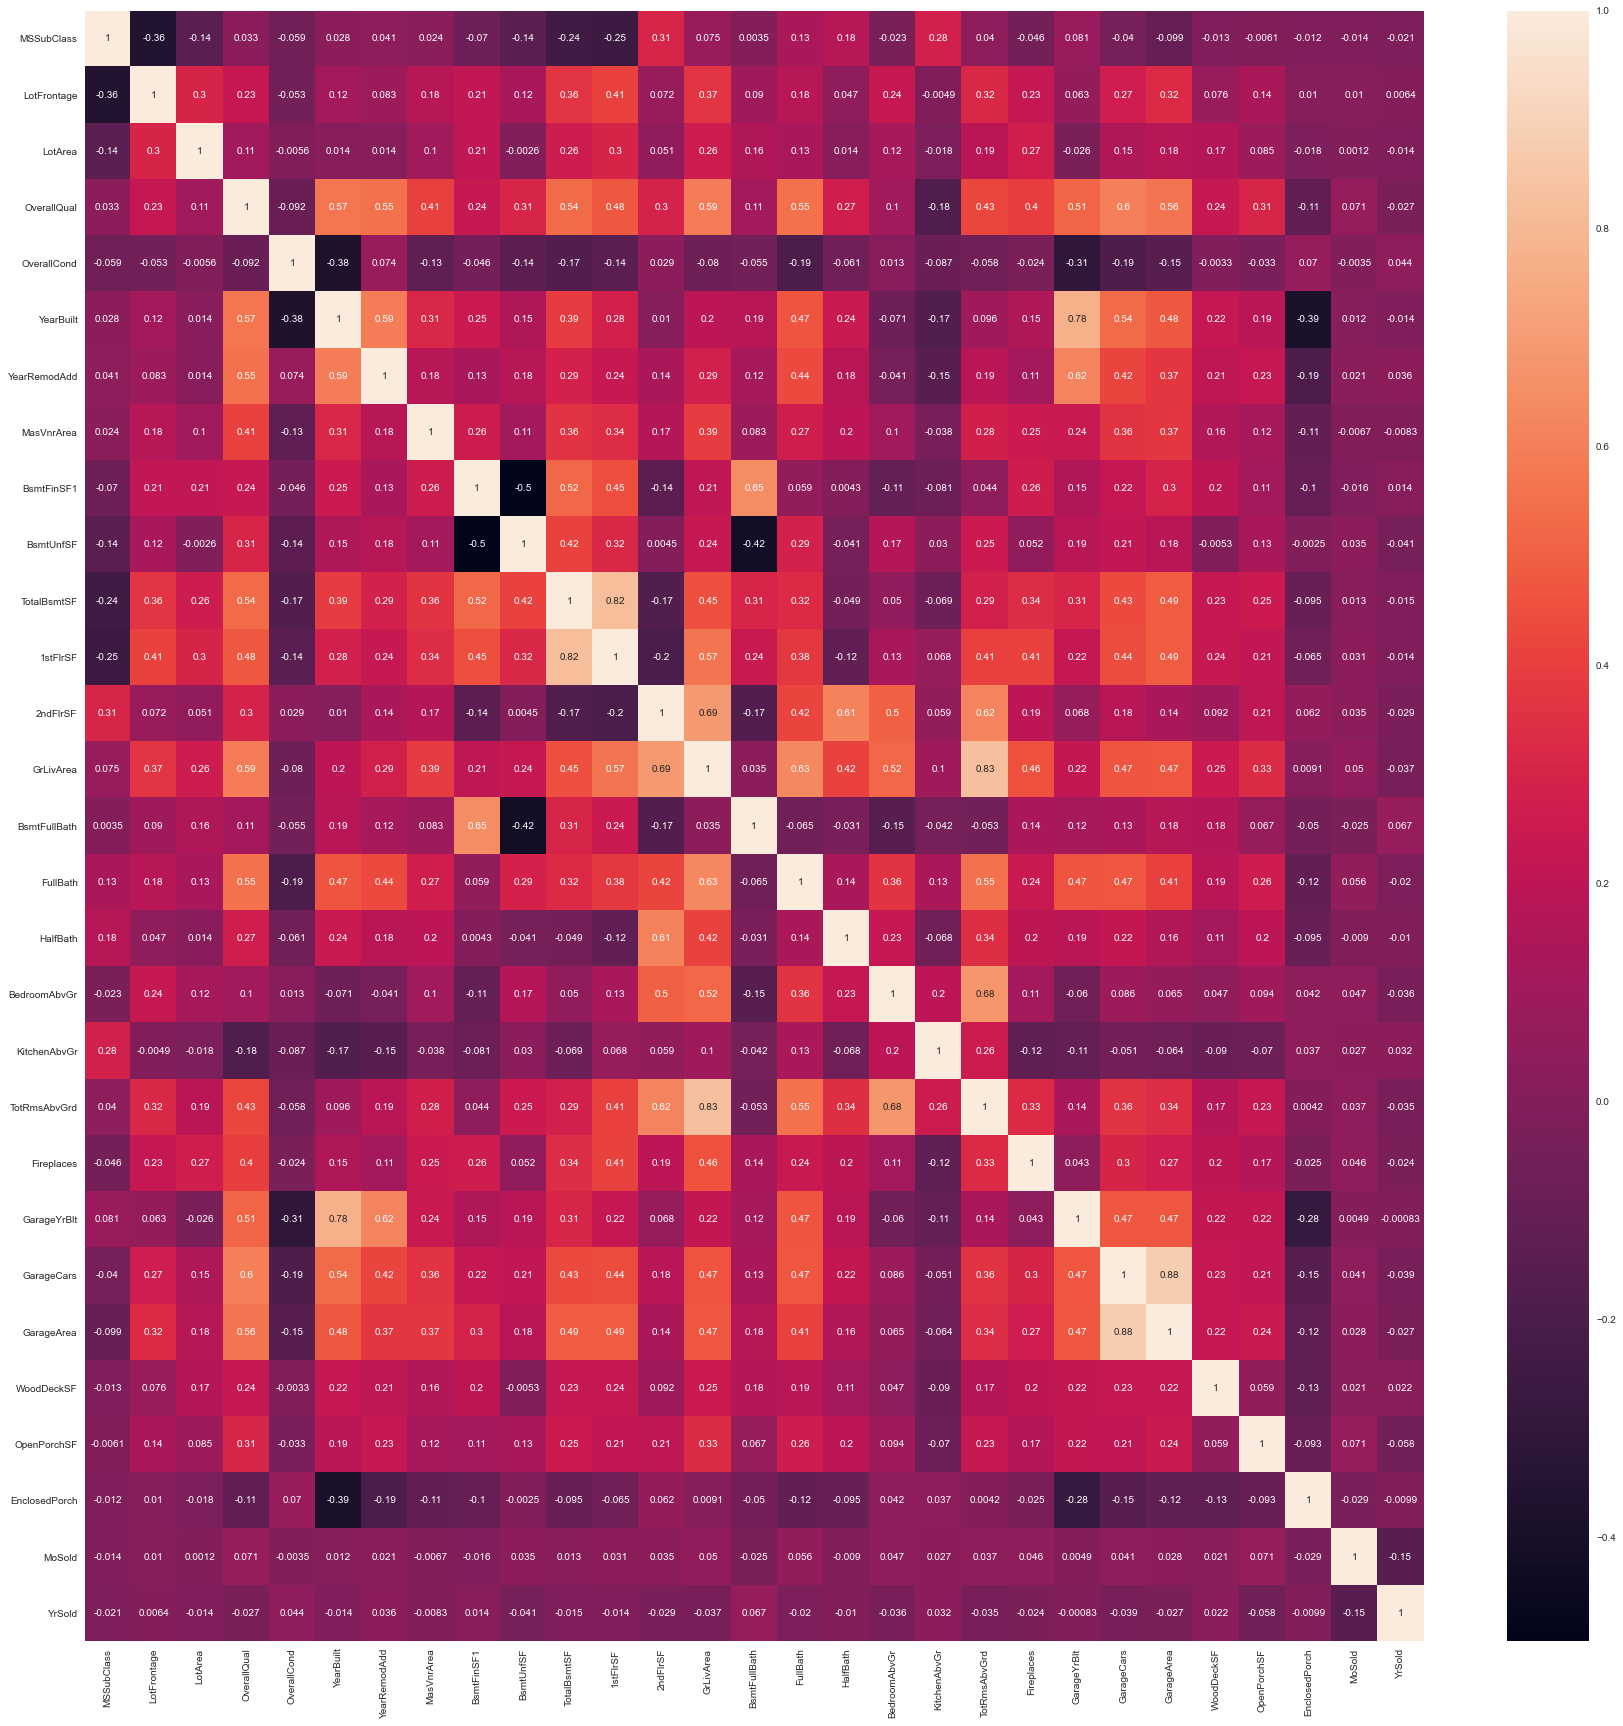

In [54]:
plt.figure(figsize=(30,30))  #새로운 figure를 생성
sns.heatmap(df_train.drop('SalePrice', axis=1).corr(), annot=True)

## Data Scaling
데이터 스케일링이란 데이터 전처리 과정의 하나입니다.

데이터 스케일링을 해주는 이유는 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해버릴 수 있기 때문입니다.

따라서, scaling은 데이터 전처리 과정에서 굉장히 중요한 과정입니다.

(1) StandardScaler : 각 feature의 평균을 0, 분산을 1로 변경합니다. 모든 특성들이 같은 스케일을 갖게 됩니다.

(2) RobustScaler: 모든 특성들이 같은 크기를 갖는다는 점에서 StandardScaler와 비슷하지만, 평균과 분산 대신 median과 quartile을 사용합니다. RobustScaler는 이상치에 영향을 받지 않습니다.

(3) MinMaxScaler : 모든 feature가 0과 1사이에 위치하게 만듭니다. 데이터가 2차원 셋일 경우, 모든 데이터는 x축의 0과 1 사이에, y축의 0과 1사이에 위치하게 됩니다.

(4) Normalizer : StandardScaler, RobustScaler, MinMaxScaler가 각 columns의 통계치를 이용한다면 Normalizer는 row마다 각각 정규화됩니다. Normalizer는 유클리드 거리가 1이 되도록 데이터를 조정합니다. (유클리드 거리는 두 점 사이의 거리를 계산할 때 쓰는 방법, L2 Distance)

In [55]:
#연속형 변수의 스케일링
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

- fit 메서드로 데이터 변환을 학습하고, transform 메서드로 실제 데이터의 스케일을 조정

In [57]:
scal_feat = df_train.copy()
scal_train = scal_feat[cont_col]  #연속형 변수들의 모아놓은 집합의 변수
scal_train = scaler.fit_transform(scal_train) 

In [58]:
scal_train

array([[ 0.07337496, -0.22087509, -0.20714171, ..., -0.3593249 ,
        -1.5991111 ,  0.13877749],
       [-0.87256276,  0.46031974, -0.09188637, ..., -0.3593249 ,
        -0.48911005, -0.61443862],
       [ 0.07337496, -0.08463612,  0.07347998, ..., -0.3593249 ,
         0.99089135,  0.13877749],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ..., -0.3593249 ,
        -0.48911005,  1.64520971],
       [-0.87256276, -0.08463612, -0.08016039, ...,  1.47378925,
        -0.8591104 ,  1.64520971],
       [-0.87256276,  0.23325479, -0.05811155, ..., -0.3593249 ,
        -0.1191097 ,  0.13877749]])

In [59]:
#새로 만든 변수에 StandardScaler로 스케일링한 것을 저장한다. 
tr = df_train.copy()
tr[cont_col] = scal_train

In [60]:
tr[cont_col]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.944591,-0.459303,-0.793434,1.161852,0.370333,1.107810,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.017598,0.311725,0.351000,-0.752176,0.216503,-0.359325,-1.599111,0.138777
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.819964,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.107927,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.489110,-0.614439
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.301643,-0.313369,-0.627826,1.189351,0.515013,1.107810,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.934226,0.311725,0.631726,-0.752176,-0.070361,-0.359325,0.990891,0.138777
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,0.383659,1.107810,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.809167,1.650307,0.790804,-0.752176,-0.176048,4.092524,-1.599111,-1.367655
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.174865,0.199680,-0.045611,1.617877,1.299326,1.107810,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.892540,1.650307,1.698485,0.780197,0.563760,-0.359325,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,0.873321,-0.238122,-0.542435,0.795198,0.250402,-0.819964,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.850854,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,0.620891,-0.614439
1456,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.049262,1.104925,2.355701,-0.795163,1.061367,1.107810,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,-0.024555,0.311725,0.126420,2.033231,-0.704483,-0.359325,-1.599111,1.645210
1457,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,0.701265,0.215641,0.065656,1.844744,1.569647,-0.819964,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.566941,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.489110,1.645210
1458,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,-1.284176,0.046905,-0.218982,-0.795163,-0.832788,1.107810,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.191766,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.859110,1.645210


In [61]:
scal_feat_test = df_test.copy()
scal_test = scal_feat_test[cont_col]
scal_test = scaler.fit_transform(scal_test)

In [62]:
scal_test

array([[-0.87471081,  0.56732969,  0.36392912, ..., -0.3607383 ,
        -0.03828073,  1.71390537],
       [-0.87471081,  0.61596272,  0.89786065, ..., -0.3607383 ,
        -0.03828073,  1.71390537],
       [ 0.06135085,  0.27553157,  0.80964587, ..., -0.3607383 ,
        -1.1406145 ,  1.71390537],
       ...,
       [-0.87471081,  4.45797141,  2.05514965, ..., -0.3607383 ,
         1.06405305, -1.35995811],
       [ 0.64638939, -0.30806469,  0.12552719, ..., -0.3607383 ,
         0.32916387, -1.35995811],
       [ 0.06135085,  0.27553157, -0.03879049, ..., -0.3607383 ,
         1.79894223, -1.35995811]])

In [63]:
te = df_test.copy()
te[cont_col] = scal_test

In [64]:
te[cont_col]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
0,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,-0.650461,-0.370716,-0.654561,-0.775254,-1.215588,-0.818068,-1.028720,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,-0.653107,-0.988189,1.185921,0.366678,-0.701628,-0.360738,-0.038281,1.713905
1,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.339225,0.639230,0.433298,-0.775254,-0.323539,-0.818068,-1.028720,1.237648,0.175997,-0.20391,-0.255371,-0.898055,-0.769806,-0.988189,-0.741235,2.347867,-0.178826,-0.360738,-0.038281,1.713905
2,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.954831,-0.266784,-0.574165,0.891944,0.294508,-0.818068,0.773083,1.237648,0.175997,-0.20391,-0.255371,0.647066,0.747276,0.301406,0.042537,0.930495,-0.207871,-0.360738,-1.140614,1.713905
3,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.526882,-0.271303,-0.579190,0.837243,0.243004,-0.818068,0.773083,1.237648,0.175997,-0.20391,0.407593,0.647066,0.786176,0.301406,-0.012788,2.089451,-0.178826,-0.360738,-0.038281,1.713905
4,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,1.059048,0.528520,0.310192,-0.775254,-0.424487,-0.818068,0.773083,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,0.552779,0.301406,0.153187,-0.729632,0.489198,-0.360738,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,-2.302019,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.563316,-0.965230,-0.018835,-1.129871,-1.533893,0.523306,-0.811797,-0.818068,-1.028720,1.237648,0.175997,-0.20391,-0.918335,-0.898055,0.047085,-2.277784,-2.179687,-0.729632,-0.701628,-0.360738,-0.038281,-1.359958
1455,2.401505,-2.302019,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.411338,-0.595537,-1.129871,-1.533893,0.523306,-0.811797,-0.818068,-1.028720,1.237648,0.175997,-0.20391,-0.255371,-0.898055,-0.303011,-0.988189,-0.861106,-0.729632,-0.353093,-0.360738,-0.773170,-1.359958
1456,-0.874711,4.457971,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.563316,1.725105,-1.268355,0.401995,0.169499,-0.775254,-0.539856,1.067495,-1.028720,-0.751040,1.381537,-0.20391,0.407593,0.647066,-0.692007,0.301406,0.475916,2.982161,-0.701628,-0.360738,1.064053,-1.359958
1457,0.646389,-0.308065,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.563316,-0.224509,0.047531,-0.302935,-0.468645,-0.775254,-1.063136,-0.818068,-1.028720,-0.751040,0.175997,-0.20391,-0.255371,-0.898055,0.047085,-2.277784,-2.179687,-0.103169,-0.236915,-0.360738,0.329164,-1.359958


## 데이터 전처리
### One hot encoding (dummy encoding)
원핫 인코딩(One-Hot Encoding)은 사람이 매우 쉽게 이해할 수 있는 데이터를 컴퓨터에게 주입시키기 위한 가장 기본적인 방법이다.
간단하게 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법이다.

수치형 데이터로만 바꾸지 않고 굳이 더미로 가변수화한 이유 : 수치형 데이터로만 변환을 하게 되면 서로 간의 관계성이 생기게 된다. 따라서, 사실이 아닌 관계성으로 인해 잘못된 학습이 일어날 수 있으므로 서로 무관한 수, 즉 더미로 만든 가변수로 변환함으로서 그러한 문제를 막아준다!


- SKlearn (사이킷런 사용 — 레이블 인코딩을 한번 거쳐야해서 상대적으로 복잡) : OneHotEncoder()
- pandas (get_dummies() 함수 사용)<br>


- get_dummies의 속성
 - drop_first=True : 열을 n-1개 생성
 - columns = col : dataframe에서 특정 열만 인코딩
 - dummy_na = True : 결측값 처리

In [65]:
cat_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [66]:
#원핫인코딩이나 더미인코딩을 사용한 범주형 변수
df_tr_encoding = pd.get_dummies(tr, drop_first=True, columns=cat_col2)  #가변수(dummy variable)로 만들어주는 것

In [71]:
df_te_encoding = pd.get_dummies(te, drop_first=True, columns=cat_col2)

In [67]:
df_tr_encoding.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not Applicable,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not Applicable,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Applicable,MiscFeature_Not Applicable,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.944591,-0.459303,-0.793434,1.161852,0.370333,1.107810,0.

- column 이름에 특수 부호를 제거하여 분석에 용이하게 하기
 - str.strip() : 앞 뒤 공백을 제거
 - str.replace() : 입력 패턴 또는 글자를 대체

In [68]:
df_tr_encoding.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=241)

In [69]:
df_tr_encoding.columns = df_tr_encoding.columns.str.strip().str.replace(' ', '_')

In [72]:
df_te_encoding.columns = df_te_encoding.columns.str.strip().str.replace(' ', '_')

- test 데이터와 train 데이터 호환성(Compatibility) 확인하기<br>
 -> train과 test의 범주형 변수를 같게 만들지 않는다면 모델에서 test dataset이 실행되지 않을 것이다.!

In [73]:
tr_columns = df_tr_encoding.columns
tr_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=241)

In [74]:
te_columns = df_te_encoding.columns
te_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=223)

위에서 train과 test를 비교해보면 train에 있는 많은 변수가 test에 존재하지 않고 반대로도 불가능한 것을 볼 수 있다.
그래서 sort_values 메서드를 이용한다.

- sort_values : 값을 기준으로 정렬하는 메소드

### 열의 목록 만들기(호환성 이용)
- intersection() : 둘 이상의 집합 간의 유사성을 포함하는 집합, 즉 같은 변수 끼리 모아놓는다.

In [76]:
tr_col_sort = df_tr_encoding.columns.sort_values()
te_col_sort = df_te_encoding.columns.sort_values()

In [77]:
set(tr_col_sort) 

{'1stFlrSF',
 '2ndFlrSF',
 'Alley_Not_Applicable',
 'Alley_Pave',
 'BedroomAbvGr',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinSF1',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFullBath',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtUnfSF',
 'CentralAir_Y',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'EnclosedPorch',
 'Exter

In [78]:
#열의 목록 만들기(호환성 이용)
#compatible_list = set(tr_col_sort)
#compatible_list = compatible_list.intersection(te_col_sort)

#train 칼럼들을 순서대로 정렬하여 test 칼럼과 유사한 칼럼들만 모아 저장하는 변수
compatible_list = set(tr_col_sort).intersection(te_col_sort)  

In [79]:
df_tr_encoding2 = df_tr_encoding[compatible_list]

In [80]:
df_tr_encoding2.head()

,GarageQual_TA,ExterQual_Fa,Fence_Not_Applicable,Neighborhood_OldTown,RoofStyle_Hip,Foundation_Stone,Exterior2nd_Stucco,SaleType_Con,RoofMatl_Tar&Grv,Neighborhood_NAmes,Exterior1st_Plywood,HouseStyle_SLvl,LandContour_Lvl,TotRmsAbvGrd,MiscFeature_Not_Applicable,Exterior2nd_VinylSd,Neighborhood_NPkVill,KitchenQual_TA,Exterior1st_BrkFace,SaleType_ConLw,Condition2_PosN,1stFlrSF,Electrical_FuseF,Exterior1st_VinylSd,YearRemodAdd,Exterior1st_HdBoard,BldgType_2fmCon,Neighborhood_Gilbert,HalfBath,BsmtFinType1_GLQ,Condition1_RRNe,Condition2_Norm,BldgType_TwnhsE,FireplaceQu_Gd,GarageType_CarPort,Neighborhood_ClearCr,SaleType_WD,Heating_Wall,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_BLQ,BsmtFinType1_LwQ,BsmtFinSF1,Neighborhood_Somerst,Exterior2nd_AsphShn,Neighborhood_IDOTRR,GarageQual_Po,BsmtFinType2_Rec,Fence_MnWw,BsmtFinType2_GLQ,Exterior2nd_Brk_Cmn,KitchenAbvGr,RoofMatl_WdShngl,Functional_Min2,BsmtUnfSF,Functional_Typ,MasVnrType_BrkFace,GarageCond_Po,Neighborhood_BrDale,Condition1_Norm,Neighborhood_CollgCr,Electrical_SBrkr,RoofStyle_Mansard,Neighborhood_Sawyer,GarageCars,Condition1_Feedr,Condition2_PosA,Foundation_Wood,MSZoning_RH,HouseStyle_2Story,SaleCondition_Family,ExterQual_TA,Neighborhood_NoRidge,Exterior2nd_Wd_Sdng,BsmtExposure_No,FireplaceQu_Not_Applicable,MSZoning_FV,Condition2_Feedr,GarageCond_TA,SaleType_New,BsmtQual_TA,SaleCondition_Normal,LotShape_IR2,Exterior1st_CemntBd,SaleType_ConLI,MoSold,BldgType_Twnhs,GrLivArea,LotConfig_FR3,LandSlope_Mod,GarageCond_Gd,Heating_GasW,PavedDrive_P,Foundation_PConc,Exterior2nd_Stone,BldgType_Duplex,Fence_MnPrv,BsmtFullBath,Foundation_Slab,HouseStyle_2.5Unf,HeatingQC_TA,Alley_Not_Applicable,GarageFinish_RFn,LandSlope_Sev,HouseStyle_1.5Unf,Neighborhood_Veenker,OverallQual,GarageType_Attchd,BsmtQual_Fa,TotalBsmtSF,Neighborhood_Blueste,SaleType_CWD,LandContour_HLS,LotConfig_CulDSac,RoofStyle_Gable,GarageType_BuiltIn,Condition1_PosN,Exterior2nd_ImStucc,MiscFeature_Shed,OpenPorchSF,Exterior1st_MetalSd,ExterCond_Po,SaleType_Oth,ExterCond_TA,Exterior1st_Stucco,BsmtExposure_Mn,Neighborhood_StoneBr,Condition1_RRAe,HouseStyle_SFoyer,Condition1_RRAn,Exterior2nd_CBlock,Fireplaces,Functional_Mod,EnclosedPorch,SaleType_ConLD,HeatingQC_Gd,WoodDeckSF,HeatingQC_Po,FireplaceQu_Fa,Electrical_FuseP,RoofStyle_Shed,KitchenQual_Gd,SaleCondition_Alloca,Functional_Min1,2ndFlrSF,BsmtFinType1_BLQ,Exterior1st_BrkComm,Alley_Pave,BsmtFinType2_Unf,Exterior2nd_BrkFace,Foundation_CBlock,Exterior2nd_Wd_Shng,OverallCond,ExterQual_Gd,Condition1_PosA,ExterCond_Gd,MSSubClass,Neighborhood_Mitchel,MiscFeature_Othr,Condition1_RRNn,Functional_Maj2,LotShape_IR3,HeatingQC_Fa,Neighborhood_NridgHt,HouseStyle_1Story,LotConfig_Inside,FireplaceQu_TA,Neighborhood_Edwards,PavedDrive_Y,BsmtCond_TA,Street_Pave,BsmtQual_Gd,FireplaceQu_Po,Neighborhood_NWAmes,Neighborhood_SawyerW,MasVnrType_Stone,KitchenQual_Fa,Functional_Sev,Neighborhood_MeadowV,Neighborhood_SWISU,LotFrontage,ExterCond_Fa,Exterior2nd_CmentBd,GarageFinish_Unf,LandContour_Low,Neighborhood_Timber,RoofStyle_Gambrel,MasVnrArea,YearBuilt,BsmtExposure_Gd,CentralAir_Y,YrSold,Fence_GdWo,BsmtCond_Po,Heating_Grav,SaleCondition_AdjLand,BsmtFinType1_Rec,GarageCond_Fa,Exterior1st_Wd_Sdng,GarageArea,BsmtFinType1_Unf,LotArea,LotConfig_FR2,MSZoning_RM,SaleCondition_Partial,BsmtCond_Gd,Exterior1st_CBlock,GarageYrBlt,MasVnrType_None,BsmtFinType2_LwQ,GarageType_Basment,Exterior1st_WdShing,RoofMatl_WdShake,Exterior2nd_HdBoard,GarageQual_Gd,Exterior1st_AsphShn,FullBath,BedroomAbvGr,GarageType_Detchd,LotShape_Reg,Neighborhood_BrkSide,Exterior2nd_Plywood,Exterior2nd_MetalSd
0,1,0,1,0,0,0,0,0,0,0,0,0,1,0.912210,1,1,0,0,0,0,0,-0.793434,0,1,0.878668,0,0,0,1.227585,1,0,1,0,0,0,0,1,0,0,1,0,0,0.575425,0,0,0,0,0,0,0,0,-0.211454,0,0,-0.944591,1,1,0,0,1,1,1,0,0,0.311725,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,-1.599111,0,0.370333,0,0,0,0,0,1,0,0,0,1.107810,0,0,0,1,1,0,0,0,0.651479,1,0,-0.459303,0,0,0,0,1,0,0,0,0,0.216503,0,0,0,1,0,0,0,0,0,0,0,-0.951226,0,-0.359325,0,0,-0.752176,0,0,0,0,1,0,0,1.161852,0,0

In [81]:
df_tr_encoding2.shape

(1460, 223)

In [82]:
df_te_encoding2 = df_te_encoding[compatible_list]

In [83]:
df_te_encoding2.head()

,GarageQual_TA,ExterQual_Fa,Fence_Not_Applicable,Neighborhood_OldTown,RoofStyle_Hip,Foundation_Stone,Exterior2nd_Stucco,SaleType_Con,RoofMatl_Tar&Grv,Neighborhood_NAmes,Exterior1st_Plywood,HouseStyle_SLvl,LandContour_Lvl,TotRmsAbvGrd,MiscFeature_Not_Applicable,Exterior2nd_VinylSd,Neighborhood_NPkVill,KitchenQual_TA,Exterior1st_BrkFace,SaleType_ConLw,Condition2_PosN,1stFlrSF,Electrical_FuseF,Exterior1st_VinylSd,YearRemodAdd,Exterior1st_HdBoard,BldgType_2fmCon,Neighborhood_Gilbert,HalfBath,BsmtFinType1_GLQ,Condition1_RRNe,Condition2_Norm,BldgType_TwnhsE,FireplaceQu_Gd,GarageType_CarPort,Neighborhood_ClearCr,SaleType_WD,Heating_Wall,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_BLQ,BsmtFinType1_LwQ,BsmtFinSF1,Neighborhood_Somerst,Exterior2nd_AsphShn,Neighborhood_IDOTRR,GarageQual_Po,BsmtFinType2_Rec,Fence_MnWw,BsmtFinType2_GLQ,Exterior2nd_Brk_Cmn,KitchenAbvGr,RoofMatl_WdShngl,Functional_Min2,BsmtUnfSF,Functional_Typ,MasVnrType_BrkFace,GarageCond_Po,Neighborhood_BrDale,Condition1_Norm,Neighborhood_CollgCr,Electrical_SBrkr,RoofStyle_Mansard,Neighborhood_Sawyer,GarageCars,Condition1_Feedr,Condition2_PosA,Foundation_Wood,MSZoning_RH,HouseStyle_2Story,SaleCondition_Family,ExterQual_TA,Neighborhood_NoRidge,Exterior2nd_Wd_Sdng,BsmtExposure_No,FireplaceQu_Not_Applicable,MSZoning_FV,Condition2_Feedr,GarageCond_TA,SaleType_New,BsmtQual_TA,SaleCondition_Normal,LotShape_IR2,Exterior1st_CemntBd,SaleType_ConLI,MoSold,BldgType_Twnhs,GrLivArea,LotConfig_FR3,LandSlope_Mod,GarageCond_Gd,Heating_GasW,PavedDrive_P,Foundation_PConc,Exterior2nd_Stone,BldgType_Duplex,Fence_MnPrv,BsmtFullBath,Foundation_Slab,HouseStyle_2.5Unf,HeatingQC_TA,Alley_Not_Applicable,GarageFinish_RFn,LandSlope_Sev,HouseStyle_1.5Unf,Neighborhood_Veenker,OverallQual,GarageType_Attchd,BsmtQual_Fa,TotalBsmtSF,Neighborhood_Blueste,SaleType_CWD,LandContour_HLS,LotConfig_CulDSac,RoofStyle_Gable,GarageType_BuiltIn,Condition1_PosN,Exterior2nd_ImStucc,MiscFeature_Shed,OpenPorchSF,Exterior1st_MetalSd,ExterCond_Po,SaleType_Oth,ExterCond_TA,Exterior1st_Stucco,BsmtExposure_Mn,Neighborhood_StoneBr,Condition1_RRAe,HouseStyle_SFoyer,Condition1_RRAn,Exterior2nd_CBlock,Fireplaces,Functional_Mod,EnclosedPorch,SaleType_ConLD,HeatingQC_Gd,WoodDeckSF,HeatingQC_Po,FireplaceQu_Fa,Electrical_FuseP,RoofStyle_Shed,KitchenQual_Gd,SaleCondition_Alloca,Functional_Min1,2ndFlrSF,BsmtFinType1_BLQ,Exterior1st_BrkComm,Alley_Pave,BsmtFinType2_Unf,Exterior2nd_BrkFace,Foundation_CBlock,Exterior2nd_Wd_Shng,OverallCond,ExterQual_Gd,Condition1_PosA,ExterCond_Gd,MSSubClass,Neighborhood_Mitchel,MiscFeature_Othr,Condition1_RRNn,Functional_Maj2,LotShape_IR3,HeatingQC_Fa,Neighborhood_NridgHt,HouseStyle_1Story,LotConfig_Inside,FireplaceQu_TA,Neighborhood_Edwards,PavedDrive_Y,BsmtCond_TA,Street_Pave,BsmtQual_Gd,FireplaceQu_Po,Neighborhood_NWAmes,Neighborhood_SawyerW,MasVnrType_Stone,KitchenQual_Fa,Functional_Sev,Neighborhood_MeadowV,Neighborhood_SWISU,LotFrontage,ExterCond_Fa,Exterior2nd_CmentBd,GarageFinish_Unf,LandContour_Low,Neighborhood_Timber,RoofStyle_Gambrel,MasVnrArea,YearBuilt,BsmtExposure_Gd,CentralAir_Y,YrSold,Fence_GdWo,BsmtCond_Po,Heating_Grav,SaleCondition_AdjLand,BsmtFinType1_Rec,GarageCond_Fa,Exterior1st_Wd_Sdng,GarageArea,BsmtFinType1_Unf,LotArea,LotConfig_FR2,MSZoning_RM,SaleCondition_Partial,BsmtCond_Gd,Exterior1st_CBlock,GarageYrBlt,MasVnrType_None,BsmtFinType2_LwQ,GarageType_Basment,Exterior1st_WdShing,RoofMatl_WdShake,Exterior2nd_HdBoard,GarageQual_Gd,Exterior1st_AsphShn,FullBath,BedroomAbvGr,GarageType_Detchd,LotShape_Reg,Neighborhood_BrkSide,Exterior2nd_Plywood,Exterior2nd_MetalSd
0,1,0,0,0,0,0,0,0,0,1,0,0,1,-0.918335,1,1,0,1,0,0,0,-0.654561,0,1,-1.072885,0,0,0,-0.751040,0,0,1,0,0,0,0,1,0,0,0,0,0,0.063428,0,0,0,0,0,0,0,0,-0.20391,0,0,-0.650461,1,0,0,0,0,0,1,0,0,-0.988189,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,-0.038281,0,-1.215588,0,0,0,0,0,0,0,0,1,-0.818068,0,0,1,1,0,0,0,0,-0.751101,1,0,-0.370716,0,0,0,0,1,0,0,0,0,-0.701628,0,0,0,1,0,0,0,0,0,0,0,-0.898055,0,-0.360738,0,0,0.366678,0,0,0,0,0,0,0,-0.775

In [84]:
df_te_encoding2.shape

(1459, 223)

- 데이터프레임의 호환성을 끝냈으니, 이제는 feature set 과 outcome 변수 를 만들어보자!<br>


## Feature set(X) and Outcome Variable(Y)
### OLS 회귀분석 (statsmodels)
전처리한 자료에 회귀분석을 적용해 변수별 회귀계수를 구할 수 있다.

In [85]:
import statsmodels.api as sm

In [88]:
X = df_tr_encoding2
Y = df_tr_encoding['SalePrice']   #df_tr_encoding2는 호환성을 하여 saleprice가 없다.

In [89]:
X.head()

,GarageQual_TA,ExterQual_Fa,Fence_Not_Applicable,Neighborhood_OldTown,RoofStyle_Hip,Foundation_Stone,Exterior2nd_Stucco,SaleType_Con,RoofMatl_Tar&Grv,Neighborhood_NAmes,Exterior1st_Plywood,HouseStyle_SLvl,LandContour_Lvl,TotRmsAbvGrd,MiscFeature_Not_Applicable,Exterior2nd_VinylSd,Neighborhood_NPkVill,KitchenQual_TA,Exterior1st_BrkFace,SaleType_ConLw,Condition2_PosN,1stFlrSF,Electrical_FuseF,Exterior1st_VinylSd,YearRemodAdd,Exterior1st_HdBoard,BldgType_2fmCon,Neighborhood_Gilbert,HalfBath,BsmtFinType1_GLQ,Condition1_RRNe,Condition2_Norm,BldgType_TwnhsE,FireplaceQu_Gd,GarageType_CarPort,Neighborhood_ClearCr,SaleType_WD,Heating_Wall,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_BLQ,BsmtFinType1_LwQ,BsmtFinSF1,Neighborhood_Somerst,Exterior2nd_AsphShn,Neighborhood_IDOTRR,GarageQual_Po,BsmtFinType2_Rec,Fence_MnWw,BsmtFinType2_GLQ,Exterior2nd_Brk_Cmn,KitchenAbvGr,RoofMatl_WdShngl,Functional_Min2,BsmtUnfSF,Functional_Typ,MasVnrType_BrkFace,GarageCond_Po,Neighborhood_BrDale,Condition1_Norm,Neighborhood_CollgCr,Electrical_SBrkr,RoofStyle_Mansard,Neighborhood_Sawyer,GarageCars,Condition1_Feedr,Condition2_PosA,Foundation_Wood,MSZoning_RH,HouseStyle_2Story,SaleCondition_Family,ExterQual_TA,Neighborhood_NoRidge,Exterior2nd_Wd_Sdng,BsmtExposure_No,FireplaceQu_Not_Applicable,MSZoning_FV,Condition2_Feedr,GarageCond_TA,SaleType_New,BsmtQual_TA,SaleCondition_Normal,LotShape_IR2,Exterior1st_CemntBd,SaleType_ConLI,MoSold,BldgType_Twnhs,GrLivArea,LotConfig_FR3,LandSlope_Mod,GarageCond_Gd,Heating_GasW,PavedDrive_P,Foundation_PConc,Exterior2nd_Stone,BldgType_Duplex,Fence_MnPrv,BsmtFullBath,Foundation_Slab,HouseStyle_2.5Unf,HeatingQC_TA,Alley_Not_Applicable,GarageFinish_RFn,LandSlope_Sev,HouseStyle_1.5Unf,Neighborhood_Veenker,OverallQual,GarageType_Attchd,BsmtQual_Fa,TotalBsmtSF,Neighborhood_Blueste,SaleType_CWD,LandContour_HLS,LotConfig_CulDSac,RoofStyle_Gable,GarageType_BuiltIn,Condition1_PosN,Exterior2nd_ImStucc,MiscFeature_Shed,OpenPorchSF,Exterior1st_MetalSd,ExterCond_Po,SaleType_Oth,ExterCond_TA,Exterior1st_Stucco,BsmtExposure_Mn,Neighborhood_StoneBr,Condition1_RRAe,HouseStyle_SFoyer,Condition1_RRAn,Exterior2nd_CBlock,Fireplaces,Functional_Mod,EnclosedPorch,SaleType_ConLD,HeatingQC_Gd,WoodDeckSF,HeatingQC_Po,FireplaceQu_Fa,Electrical_FuseP,RoofStyle_Shed,KitchenQual_Gd,SaleCondition_Alloca,Functional_Min1,2ndFlrSF,BsmtFinType1_BLQ,Exterior1st_BrkComm,Alley_Pave,BsmtFinType2_Unf,Exterior2nd_BrkFace,Foundation_CBlock,Exterior2nd_Wd_Shng,OverallCond,ExterQual_Gd,Condition1_PosA,ExterCond_Gd,MSSubClass,Neighborhood_Mitchel,MiscFeature_Othr,Condition1_RRNn,Functional_Maj2,LotShape_IR3,HeatingQC_Fa,Neighborhood_NridgHt,HouseStyle_1Story,LotConfig_Inside,FireplaceQu_TA,Neighborhood_Edwards,PavedDrive_Y,BsmtCond_TA,Street_Pave,BsmtQual_Gd,FireplaceQu_Po,Neighborhood_NWAmes,Neighborhood_SawyerW,MasVnrType_Stone,KitchenQual_Fa,Functional_Sev,Neighborhood_MeadowV,Neighborhood_SWISU,LotFrontage,ExterCond_Fa,Exterior2nd_CmentBd,GarageFinish_Unf,LandContour_Low,Neighborhood_Timber,RoofStyle_Gambrel,MasVnrArea,YearBuilt,BsmtExposure_Gd,CentralAir_Y,YrSold,Fence_GdWo,BsmtCond_Po,Heating_Grav,SaleCondition_AdjLand,BsmtFinType1_Rec,GarageCond_Fa,Exterior1st_Wd_Sdng,GarageArea,BsmtFinType1_Unf,LotArea,LotConfig_FR2,MSZoning_RM,SaleCondition_Partial,BsmtCond_Gd,Exterior1st_CBlock,GarageYrBlt,MasVnrType_None,BsmtFinType2_LwQ,GarageType_Basment,Exterior1st_WdShing,RoofMatl_WdShake,Exterior2nd_HdBoard,GarageQual_Gd,Exterior1st_AsphShn,FullBath,BedroomAbvGr,GarageType_Detchd,LotShape_Reg,Neighborhood_BrkSide,Exterior2nd_Plywood,Exterior2nd_MetalSd
0,1,0,1,0,0,0,0,0,0,0,0,0,1,0.912210,1,1,0,0,0,0,0,-0.793434,0,1,0.878668,0,0,0,1.227585,1,0,1,0,0,0,0,1,0,0,1,0,0,0.575425,0,0,0,0,0,0,0,0,-0.211454,0,0,-0.944591,1,1,0,0,1,1,1,0,0,0.311725,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,-1.599111,0,0.370333,0,0,0,0,0,1,0,0,0,1.107810,0,0,0,1,1,0,0,0,0.651479,1,0,-0.459303,0,0,0,0,1,0,0,0,0,0.216503,0,0,0,1,0,0,0,0,0,0,0,-0.951226,0,-0.359325,0,0,-0.752176,0,0,0,0,1,0,0,1.161852,0,0

In [90]:
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### train test split
머신러닝 모델을 학습하고 그 결과를 검증하기 위해서는 원래의 데이터를 Training, Validation, Testing의 용도로 나누어 다뤄야 한다. 그렇지 않고 Training에 사용한 데이터를 검증용으로 사용하면, 시험문제를 알고 있는 상태에서 공부를 하고 그 지식을 바탕으로 시험을 치루는 꼴이므로 제대로 된 검증이 이루어지지 않기 때문이다.

딥러닝을 제외하고도 다양한 기계학습과 데이터 분석 툴을 제공하는 scikit-learn 패키지 중 model_selection에는 데이터 분할을 위한 train_test_split 함수가 들어있다.

- X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.

- X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환

- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

참고 자료 : http://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.25, random_state=40)

In [93]:
#선형 회귀 함수를 호출하고 training 데이터에서 가장 적합한 모델 찾기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

실험이 끝나면 training이 끝난 모델의 coef_ 속성에 값이 저장된다.<br>
intercept_ 속성은 항상 실수 값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열

In [94]:
model.coef_

array([ 4.81797083e-02, -1.48909069e-02, -1.57732016e-03, -7.75329901e-02,
       -8.63189073e-02, -3.39303808e-02,  1.63619859e-03,  2.66172350e-01,
       -3.97495644e-03, -2.93506289e-02,  4.41420663e-02, -1.12356013e-02,
        7.24609433e-02,  8.69022721e-03,  2.63504686e-02,  1.17291406e-02,
        9.22822100e-04, -1.02282797e-01,  9.53509021e-02,  8.45229431e-03,
       -6.46090109e-01, -2.43727239e-02, -1.15984885e-02,  2.11558930e-02,
        2.14983772e-02, -2.09149918e-02,  8.07027625e-02, -2.08157088e-02,
        1.14659086e-02,  5.30990744e-03,  6.94569913e-02, -2.25339788e-02,
       -1.96094877e-02, -8.99207326e-03,  1.13688904e-01,  3.74541017e-02,
       -5.16280821e-03,  1.12459467e-01,  1.31232071e-01,  4.71052133e-01,
       -9.55763625e-02, -3.81921934e-02, -2.13824556e-02,  1.85351318e-02,
       -6.46459901e-04, -2.19949881e-02, -8.39317164e-02, -5.26855802e-02,
       -2.33982494e-02, -3.13774590e-02, -3.29929678e-02, -6.80033028e-03,
        1.34089150e-01,  

In [95]:
X_train.columns

Index(['GarageQual_TA', 'ExterQual_Fa', 'Fence_Not_Applicable',
       'Neighborhood_OldTown', 'RoofStyle_Hip', 'Foundation_Stone',
       'Exterior2nd_Stucco', 'SaleType_Con', 'RoofMatl_Tar&Grv',
       'Neighborhood_NAmes',
       ...
       'Exterior2nd_HdBoard', 'GarageQual_Gd', 'Exterior1st_AsphShn',
       'FullBath', 'BedroomAbvGr', 'GarageType_Detchd', 'LotShape_Reg',
       'Neighborhood_BrkSide', 'Exterior2nd_Plywood', 'Exterior2nd_MetalSd'],
      dtype='object', length=223)

In [96]:
#열거하는 메소드인 enumerate를 이용하여 각 독립 속성의 계수를 분석해보자
for i, col in enumerate(X_train.columns) : 
    print("coefficient(계수) of ", col, " is ", model.coef_[i])

coefficient(계수) of  GarageQual_TA  is  0.04817970829458179
coefficient(계수) of  ExterQual_Fa  is  -0.014890906945592891
coefficient(계수) of  Fence_Not_Applicable  is  -0.0015773201619448535
coefficient(계수) of  Neighborhood_OldTown  is  -0.07753299012301909
coefficient(계수) of  RoofStyle_Hip  is  -0.086318907284189
coefficient(계수) of  Foundation_Stone  is  -0.03393038083259057
coefficient(계수) of  Exterior2nd_Stucco  is  0.0016361985922466182
coefficient(계수) of  SaleType_Con  is  0.26617234989965244
coefficient(계수) of  RoofMatl_Tar&Grv  is  -0.003974956440139573
coefficient(계수) of  Neighborhood_NAmes  is  -0.029350628887201614
coefficient(계수) of  Exterior1st_Plywood  is  0.04414206628744721
coefficient(계수) of  HouseStyle_SLvl  is  -0.011235601277507827
coefficient(계수) of  LandContour_Lvl  is  0.07246094333835149
coefficient(계수) of  TotRmsAbvGrd  is  0.008690227210778279
coefficient(계수) of  MiscFeature_Not_Applicable  is  0.026350468598179515
coefficient(계수) of  Exterior2nd_VinylSd  is  0.01

모델을 가로막는 것을 확인하기

In [97]:
intercept = model.intercept_
print("The intercept of model is ", intercept)

The intercept of model is  11.426096474843959


### 모델 평가 : score를 이용해 평가

- 모델을 만들었으므로 얼마나 정확한지 성능을 확인해 보자.<br>
ex) 0.973 의 결과는 97.3% 를 정확히 예측했다는 의미이다. (실행할 때마다 결과가 달라진다)


In [98]:
model.score(X_train, Y_train)

0.9314863253905797

In [99]:
model.score(X_test, Y_test)

-7.456019243097565e+21

### 통계분석 모형(Statsmodels)을 사용한 선형 회귀 분석(Linear Regression)
- pd.concat()함수는 데이터프레임을 말그대로 물리적으로 이어 붙여주는 함수 (열방향axis=1)

In [100]:
X_train.head()

,GarageQual_TA,ExterQual_Fa,Fence_Not_Applicable,Neighborhood_OldTown,RoofStyle_Hip,Foundation_Stone,Exterior2nd_Stucco,SaleType_Con,RoofMatl_Tar&Grv,Neighborhood_NAmes,Exterior1st_Plywood,HouseStyle_SLvl,LandContour_Lvl,TotRmsAbvGrd,MiscFeature_Not_Applicable,Exterior2nd_VinylSd,Neighborhood_NPkVill,KitchenQual_TA,Exterior1st_BrkFace,SaleType_ConLw,Condition2_PosN,1stFlrSF,Electrical_FuseF,Exterior1st_VinylSd,YearRemodAdd,Exterior1st_HdBoard,BldgType_2fmCon,Neighborhood_Gilbert,HalfBath,BsmtFinType1_GLQ,Condition1_RRNe,Condition2_Norm,BldgType_TwnhsE,FireplaceQu_Gd,GarageType_CarPort,Neighborhood_ClearCr,SaleType_WD,Heating_Wall,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_BLQ,BsmtFinType1_LwQ,BsmtFinSF1,Neighborhood_Somerst,Exterior2nd_AsphShn,Neighborhood_IDOTRR,GarageQual_Po,BsmtFinType2_Rec,Fence_MnWw,BsmtFinType2_GLQ,Exterior2nd_Brk_Cmn,KitchenAbvGr,RoofMatl_WdShngl,Functional_Min2,BsmtUnfSF,Functional_Typ,MasVnrType_BrkFace,GarageCond_Po,Neighborhood_BrDale,Condition1_Norm,Neighborhood_CollgCr,Electrical_SBrkr,RoofStyle_Mansard,Neighborhood_Sawyer,GarageCars,Condition1_Feedr,Condition2_PosA,Foundation_Wood,MSZoning_RH,HouseStyle_2Story,SaleCondition_Family,ExterQual_TA,Neighborhood_NoRidge,Exterior2nd_Wd_Sdng,BsmtExposure_No,FireplaceQu_Not_Applicable,MSZoning_FV,Condition2_Feedr,GarageCond_TA,SaleType_New,BsmtQual_TA,SaleCondition_Normal,LotShape_IR2,Exterior1st_CemntBd,SaleType_ConLI,MoSold,BldgType_Twnhs,GrLivArea,LotConfig_FR3,LandSlope_Mod,GarageCond_Gd,Heating_GasW,PavedDrive_P,Foundation_PConc,Exterior2nd_Stone,BldgType_Duplex,Fence_MnPrv,BsmtFullBath,Foundation_Slab,HouseStyle_2.5Unf,HeatingQC_TA,Alley_Not_Applicable,GarageFinish_RFn,LandSlope_Sev,HouseStyle_1.5Unf,Neighborhood_Veenker,OverallQual,GarageType_Attchd,BsmtQual_Fa,TotalBsmtSF,Neighborhood_Blueste,SaleType_CWD,LandContour_HLS,LotConfig_CulDSac,RoofStyle_Gable,GarageType_BuiltIn,Condition1_PosN,Exterior2nd_ImStucc,MiscFeature_Shed,OpenPorchSF,Exterior1st_MetalSd,ExterCond_Po,SaleType_Oth,ExterCond_TA,Exterior1st_Stucco,BsmtExposure_Mn,Neighborhood_StoneBr,Condition1_RRAe,HouseStyle_SFoyer,Condition1_RRAn,Exterior2nd_CBlock,Fireplaces,Functional_Mod,EnclosedPorch,SaleType_ConLD,HeatingQC_Gd,WoodDeckSF,HeatingQC_Po,FireplaceQu_Fa,Electrical_FuseP,RoofStyle_Shed,KitchenQual_Gd,SaleCondition_Alloca,Functional_Min1,2ndFlrSF,BsmtFinType1_BLQ,Exterior1st_BrkComm,Alley_Pave,BsmtFinType2_Unf,Exterior2nd_BrkFace,Foundation_CBlock,Exterior2nd_Wd_Shng,OverallCond,ExterQual_Gd,Condition1_PosA,ExterCond_Gd,MSSubClass,Neighborhood_Mitchel,MiscFeature_Othr,Condition1_RRNn,Functional_Maj2,LotShape_IR3,HeatingQC_Fa,Neighborhood_NridgHt,HouseStyle_1Story,LotConfig_Inside,FireplaceQu_TA,Neighborhood_Edwards,PavedDrive_Y,BsmtCond_TA,Street_Pave,BsmtQual_Gd,FireplaceQu_Po,Neighborhood_NWAmes,Neighborhood_SawyerW,MasVnrType_Stone,KitchenQual_Fa,Functional_Sev,Neighborhood_MeadowV,Neighborhood_SWISU,LotFrontage,ExterCond_Fa,Exterior2nd_CmentBd,GarageFinish_Unf,LandContour_Low,Neighborhood_Timber,RoofStyle_Gambrel,MasVnrArea,YearBuilt,BsmtExposure_Gd,CentralAir_Y,YrSold,Fence_GdWo,BsmtCond_Po,Heating_Grav,SaleCondition_AdjLand,BsmtFinType1_Rec,GarageCond_Fa,Exterior1st_Wd_Sdng,GarageArea,BsmtFinType1_Unf,LotArea,LotConfig_FR2,MSZoning_RM,SaleCondition_Partial,BsmtCond_Gd,Exterior1st_CBlock,GarageYrBlt,MasVnrType_None,BsmtFinType2_LwQ,GarageType_Basment,Exterior1st_WdShing,RoofMatl_WdShake,Exterior2nd_HdBoard,GarageQual_Gd,Exterior1st_AsphShn,FullBath,BedroomAbvGr,GarageType_Detchd,LotShape_Reg,Neighborhood_BrkSide,Exterior2nd_Plywood,Exterior2nd_MetalSd
621,1,0,1,0,0,0,0,0,0,0,0,0,1,1.527656,1,0,0,1,0,0,0,0.997200,0,0,0.587947,1,0,0,1.227585,0,0,1,0,0,0,0,1,0,0,1,0,0,1.123740,0,0,0,0,1,0,0,0,-0.211454,0,0,-0.414838,1,0,0,0,1,0,1,0,0,0.311725,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,-0.119110,0,2.091254,0,0,0,0,0,0,0,0,0,-0.819964,0,0,1,1,1,0,0,0,-0.071836,1,0,1.059321,0,0,0,0,1,0,0,0,0,2.964364,0,0,0,1,0,0,0,0,0,0,0,0.600495,0,-0.359325,0,0,-0.448894,0,0,0,0,0,0,0,1.647668,0,

In [101]:
Y_train.head()

621     12.388394
1023    12.160029
765     12.484204
897     11.870271
20      12.692503
Name: SalePrice, dtype: float64

In [102]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

,GarageQual_TA,ExterQual_Fa,Fence_Not_Applicable,Neighborhood_OldTown,RoofStyle_Hip,Foundation_Stone,Exterior2nd_Stucco,SaleType_Con,RoofMatl_Tar&Grv,Neighborhood_NAmes,Exterior1st_Plywood,HouseStyle_SLvl,LandContour_Lvl,TotRmsAbvGrd,MiscFeature_Not_Applicable,Exterior2nd_VinylSd,Neighborhood_NPkVill,KitchenQual_TA,Exterior1st_BrkFace,SaleType_ConLw,Condition2_PosN,1stFlrSF,Electrical_FuseF,Exterior1st_VinylSd,YearRemodAdd,Exterior1st_HdBoard,BldgType_2fmCon,Neighborhood_Gilbert,HalfBath,BsmtFinType1_GLQ,Condition1_RRNe,Condition2_Norm,BldgType_TwnhsE,FireplaceQu_Gd,GarageType_CarPort,Neighborhood_ClearCr,SaleType_WD,Heating_Wall,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_BLQ,BsmtFinType1_LwQ,BsmtFinSF1,Neighborhood_Somerst,Exterior2nd_AsphShn,Neighborhood_IDOTRR,GarageQual_Po,BsmtFinType2_Rec,Fence_MnWw,BsmtFinType2_GLQ,Exterior2nd_Brk_Cmn,KitchenAbvGr,RoofMatl_WdShngl,Functional_Min2,BsmtUnfSF,Functional_Typ,MasVnrType_BrkFace,GarageCond_Po,Neighborhood_BrDale,Condition1_Norm,Neighborhood_CollgCr,Electrical_SBrkr,RoofStyle_Mansard,Neighborhood_Sawyer,GarageCars,Condition1_Feedr,Condition2_PosA,Foundation_Wood,MSZoning_RH,HouseStyle_2Story,SaleCondition_Family,ExterQual_TA,Neighborhood_NoRidge,Exterior2nd_Wd_Sdng,BsmtExposure_No,FireplaceQu_Not_Applicable,MSZoning_FV,Condition2_Feedr,GarageCond_TA,SaleType_New,BsmtQual_TA,SaleCondition_Normal,LotShape_IR2,Exterior1st_CemntBd,SaleType_ConLI,MoSold,BldgType_Twnhs,GrLivArea,LotConfig_FR3,LandSlope_Mod,GarageCond_Gd,Heating_GasW,PavedDrive_P,Foundation_PConc,Exterior2nd_Stone,BldgType_Duplex,Fence_MnPrv,BsmtFullBath,Foundation_Slab,HouseStyle_2.5Unf,HeatingQC_TA,Alley_Not_Applicable,GarageFinish_RFn,LandSlope_Sev,HouseStyle_1.5Unf,Neighborhood_Veenker,OverallQual,GarageType_Attchd,BsmtQual_Fa,TotalBsmtSF,Neighborhood_Blueste,SaleType_CWD,LandContour_HLS,LotConfig_CulDSac,RoofStyle_Gable,GarageType_BuiltIn,Condition1_PosN,Exterior2nd_ImStucc,MiscFeature_Shed,OpenPorchSF,Exterior1st_MetalSd,ExterCond_Po,SaleType_Oth,ExterCond_TA,Exterior1st_Stucco,BsmtExposure_Mn,Neighborhood_StoneBr,Condition1_RRAe,HouseStyle_SFoyer,Condition1_RRAn,Exterior2nd_CBlock,Fireplaces,Functional_Mod,EnclosedPorch,SaleType_ConLD,HeatingQC_Gd,WoodDeckSF,HeatingQC_Po,FireplaceQu_Fa,Electrical_FuseP,RoofStyle_Shed,KitchenQual_Gd,SaleCondition_Alloca,Functional_Min1,2ndFlrSF,BsmtFinType1_BLQ,Exterior1st_BrkComm,Alley_Pave,BsmtFinType2_Unf,Exterior2nd_BrkFace,Foundation_CBlock,Exterior2nd_Wd_Shng,OverallCond,ExterQual_Gd,Condition1_PosA,ExterCond_Gd,MSSubClass,Neighborhood_Mitchel,MiscFeature_Othr,Condition1_RRNn,Functional_Maj2,LotShape_IR3,HeatingQC_Fa,Neighborhood_NridgHt,HouseStyle_1Story,LotConfig_Inside,FireplaceQu_TA,Neighborhood_Edwards,PavedDrive_Y,BsmtCond_TA,Street_Pave,BsmtQual_Gd,FireplaceQu_Po,Neighborhood_NWAmes,Neighborhood_SawyerW,MasVnrType_Stone,KitchenQual_Fa,Functional_Sev,Neighborhood_MeadowV,Neighborhood_SWISU,LotFrontage,ExterCond_Fa,Exterior2nd_CmentBd,GarageFinish_Unf,LandContour_Low,Neighborhood_Timber,RoofStyle_Gambrel,MasVnrArea,YearBuilt,BsmtExposure_Gd,CentralAir_Y,YrSold,Fence_GdWo,BsmtCond_Po,Heating_Grav,SaleCondition_AdjLand,BsmtFinType1_Rec,GarageCond_Fa,Exterior1st_Wd_Sdng,GarageArea,BsmtFinType1_Unf,LotArea,LotConfig_FR2,MSZoning_RM,SaleCondition_Partial,BsmtCond_Gd,Exterior1st_CBlock,GarageYrBlt,MasVnrType_None,BsmtFinType2_LwQ,GarageType_Basment,Exterior1st_WdShing,RoofMatl_WdShake,Exterior2nd_HdBoard,GarageQual_Gd,Exterior1st_AsphShn,FullBath,BedroomAbvGr,GarageType_Detchd,LotShape_Reg,Neighborhood_BrkSide,Exterior2nd_Plywood,Exterior2nd_MetalSd,SalePrice
621,1,0,1,0,0,0,0,0,0,0,0,0,1,1.527656,1,0,0,1,0,0,0,0.997200,0,0,0.587947,1,0,0,1.227585,0,0,1,0,0,0,0,1,0,0,1,0,0,1.123740,0,0,0,0,1,0,0,0,-0.211454,0,0,-0.414838,1,0,0,0,1,0,1,0,0,0.311725,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,-0.119110,0,2.091254,0,0,0,0,0,0,0,0,0,-0.819964,0,0,1,1,1,0,0,0,-0.071836,1,0,1.059321,0,0,0,0,1,0,0,0,0,2.964364,0,0,0,1,0,0,0,0,0,0,0,0.600495,0,-0.359325,0,0,-0.448894,0,0,0,0,0,0,0,1

### OLS 회귀분석 (statsmodels) - 단일/다중 선형회귀에 사용
import하여 문해율, 재산순위, 수도까지의 거리가 재산범죄에 미치는 영향을 살펴볼 수 있다.

Ordinary Least Squares(OLS) 방식을 사용한다.

- formula의 속성 : SalePrice에 어떤 변수가 영향을 미치는지 확인하기위해 Alley_Not_Applicable + Alley_Pave + BedroomAbvGr + BldgType_2fmCon....등등의 변수를 사용해 다중회귀분석을 시행한다.
- summary()함수 : 분석에 대한 요약을 한눈에 볼 수 있다.

In [103]:
formula_value = 'SalePrice ~ Alley_Not_Applicable + Alley_Pave + BedroomAbvGr + BldgType_2fmCon + BldgType_Duplex + BldgType_Twnhs + BldgType_TwnhsE + BsmtCond_Gd + BsmtCond_Po + BsmtCond_TA + BsmtExposure_Gd + BsmtExposure_Mn + BsmtExposure_No + BsmtFinSF1 + BsmtFinType1_BLQ + BsmtFinType1_GLQ + BsmtFinType1_LwQ + BsmtFinType1_Rec + BsmtFinType1_Unf + BsmtFinType2_BLQ + BsmtFinType2_GLQ + BsmtFinType2_LwQ + BsmtFinType2_Rec + BsmtFinType2_Unf + BsmtFullBath + BsmtQual_Fa + BsmtQual_Gd + BsmtQual_TA + BsmtUnfSF + CentralAir_Y + Condition1_Feedr + Condition1_Norm + Condition1_PosA + Condition1_PosN + Condition1_RRAe + Condition1_RRAn + Condition1_RRNe + Condition1_RRNn + Condition2_Feedr + Condition2_Norm + Condition2_PosA + Condition2_PosN + Electrical_FuseF + Electrical_FuseP + Electrical_SBrkr + EnclosedPorch + ExterCond_Fa + ExterCond_Gd + ExterCond_Po + ExterCond_TA + ExterQual_Fa + ExterQual_Gd + ExterQual_TA + Exterior1st_AsphShn + Exterior1st_BrkComm + Exterior1st_BrkFace + Exterior1st_CBlock + Exterior1st_CemntBd + Exterior1st_HdBoard + Exterior1st_MetalSd + Exterior1st_Plywood + Exterior1st_Stucco + Exterior1st_VinylSd + Exterior1st_WdShing + Exterior1st_Wd_Sdng + Exterior2nd_AsphShn + Exterior2nd_BrkFace + Exterior2nd_Brk_Cmn + Exterior2nd_CBlock + Exterior2nd_CmentBd + Exterior2nd_HdBoard + Exterior2nd_ImStucc + Exterior2nd_MetalSd + Exterior2nd_Plywood + Exterior2nd_Stone + Exterior2nd_Stucco + Exterior2nd_VinylSd + Exterior2nd_Wd_Sdng + Exterior2nd_Wd_Shng + Fence_GdWo + Fence_MnPrv + Fence_MnWw + Fence_Not_Applicable + FireplaceQu_Fa + FireplaceQu_Gd + FireplaceQu_Not_Applicable + FireplaceQu_Po + FireplaceQu_TA + Fireplaces + Foundation_CBlock + Foundation_PConc + Foundation_Slab + Foundation_Stone + Foundation_Wood + FullBath + Functional_Maj2 + Functional_Min1 + Functional_Min2 + Functional_Mod + Functional_Sev + Functional_Typ + GarageArea + GarageCars + GarageCond_Fa + GarageCond_Gd + GarageCond_Po + GarageCond_TA + GarageFinish_RFn + GarageFinish_Unf + GarageQual_Gd + GarageQual_Po + GarageQual_TA + GarageType_Attchd + GarageType_Basment + GarageType_BuiltIn + GarageType_CarPort + GarageType_Detchd + GarageYrBlt + GrLivArea + HalfBath + HeatingQC_Fa + HeatingQC_Gd + HeatingQC_Po + HeatingQC_TA + Heating_GasW + Heating_Grav + Heating_Wall + HouseStyle_SFoyer + HouseStyle_SLvl + KitchenAbvGr + KitchenQual_Fa + KitchenQual_Gd + KitchenQual_TA + LandContour_HLS + LandContour_Low + LandContour_Lvl + LandSlope_Mod + LandSlope_Sev + LotArea + LotConfig_CulDSac + LotConfig_FR2 + LotConfig_FR3 + LotConfig_Inside + LotFrontage + LotShape_IR2 + LotShape_IR3 + LotShape_Reg + MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM + MasVnrArea + MasVnrType_BrkFace + MasVnrType_None + MasVnrType_Stone + MiscFeature_Not_Applicable + MiscFeature_Othr + MiscFeature_Shed + Neighborhood_Blueste + Neighborhood_BrDale + Neighborhood_BrkSide + Neighborhood_ClearCr + Neighborhood_CollgCr + Neighborhood_Crawfor + Neighborhood_Edwards + Neighborhood_Gilbert + Neighborhood_IDOTRR + Neighborhood_MeadowV + Neighborhood_Mitchel + Neighborhood_NAmes + Neighborhood_NPkVill + Neighborhood_NWAmes + Neighborhood_NoRidge + Neighborhood_NridgHt + Neighborhood_OldTown + Neighborhood_SWISU + Neighborhood_Sawyer + Neighborhood_SawyerW + Neighborhood_Somerst + Neighborhood_StoneBr + Neighborhood_Timber + Neighborhood_Veenker + OpenPorchSF + OverallCond + OverallQual + PavedDrive_P + PavedDrive_Y + RoofMatl_WdShake + RoofMatl_WdShngl + RoofStyle_Gable + RoofStyle_Gambrel + RoofStyle_Hip + RoofStyle_Mansard + RoofStyle_Shed + SaleCondition_AdjLand + SaleCondition_Alloca + SaleCondition_Family + SaleCondition_Normal + SaleCondition_Partial + SaleType_CWD + SaleType_Con + SaleType_ConLD + SaleType_ConLI + SaleType_ConLw + SaleType_New + SaleType_Oth + SaleType_WD + Street_Pave + TotRmsAbvGrd + TotalBsmtSF + WoodDeckSF + YearBuilt + YearRemodAdd'

회귀 방정식의 변수 계수를 확인하기

In [104]:
import statsmodels.formula.api as smf

In [105]:
model1 = smf.ols(formula=formula_value, data=data_train).fit()

In [106]:
model1.params.head()

Intercept               11.378182
Alley_Not_Applicable    -0.022784
Alley_Pave               0.022514
BedroomAbvGr             0.005386
BldgType_2fmCon         -0.032594
dtype: float64

In [107]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     56.15
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:31:04   Log-Likelihood:                 887.11
No. Observations:                1095   AIC:                            -1354.
Df Residuals:                     885   BIC:                            -304.5
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     11.3782      0.253     44.919      0.000      10.881      11.875
Alley_Not_Applicable          -0.0228      0.028     -0.818      0.414      -0.077       0.032
Alley_Pave                     0.0225      0.040      0.568      0.570      -0.055       0.100
BedroomAbvGr                   0.0054      0.007      0.795      0.427      -0.008       0.019
BldgType_2fmCon               -0.0326      0.037     -0.889      0.374      -0.105       0.039
BldgType_Duplex               -0.0232      0.038     -0.605      0.545      -0.098       0.052
BldgType_Twnhs                -0.1256      0.035     -3.630      0.000      -0.193      -0.058
BldgType_TwnhsE               -0.0947      0.023     -4.046      0.000      -0.141      -0.049
BsmtCond_Gd                    0.0645      0.033      1.937      0.053      -0.001       0.130
BsmtCond_Po                    0.1245      0.135      0.919      0.358      -0.141       0.390
BsmtCond_TA                    0.0583      0.027      2.124      0.034       0.004       0.112
BsmtExposure_Gd                0.0366      0.018      2.053      0.040       0.002       0.072
BsmtExposure_Mn               -0.0049      0.019     -0.257      0.797      -0.042       0.033
BsmtExposure_No               -0.0195      0.013     -1.492      0.136      -0.045       0.006
BsmtFinSF1                    -0.0209      0.022     -0.951      0.342      -0.064       0.022
BsmtFinType1_BLQ              -0.0083      0.017     -0.478      0.633      -0.043       0.026
BsmtFinType1_GLQ               0.0085      0.015      0.558      0.577      -0.021       0.038
BsmtFinType1_LwQ              -0.0340      0.024     -1.422      0.155      -0.081       0.013
BsmtFinType1_Rec              -0.0112      0.019     -0.599      0.549      -0.048       0.025
BsmtFinType1_Unf              -0.0717      0.018     -4.080      0.000      -0.106      -0.037
BsmtFinType2_BLQ              -0.0854      0.046     -1.874      0.061      -0.175       0.004
BsmtFinType2_GLQ              -0.0174      0.057     -0.305      0.761      -0.130       0.095
BsmtFinType2_LwQ              -0.0362      0.045     -0.804      0.422      -0.124       0.052
BsmtFinType2_Rec              -0.0454      0.044     -1.035      0.301      -0.131       0.041
BsmtFinType2_Unf              -0.0344      0.047     -0.728      0.467      -0.127       0.058
BsmtFullBath                   0.0202      0.006      3.378      0.001       0.008       0.032
BsmtQual_Fa                   -0.0225      0.041     -0.550      0.582      -0.103       0.058
BsmtQual_Gd                   -0.0556      0.020     -2.838      0.005      -0.094      -0.017
BsmtQual_TA                   -0.0594      0.025     -2.391      0.017      -0.108      -0.011
BsmtUnfSF                     -0.0029      

평균 제곱의 오차 계산하기
- predict 함수 : fit 함수로 모델을 훈련하고 나면, 예측을 만들 수 있다.

In [108]:
model1.predict(data_train.drop('SalePrice',axis=1))

621     12.314270
1023    12.165962
765     12.427859
897     11.847973
20      12.767644
          ...    
1016    12.321694
165     11.648134
7       12.274132
219     12.091803
1350    12.198236
Length: 1095, dtype: float64

In [109]:
(model1.predict(data_train.drop('SalePrice',axis=1)) - data_train['SalePrice'])**2

621     0.005494
1023    0.000035
765     0.003175
897     0.000497
20      0.005646
          ...   
1016    0.010147
165     0.011607
7       0.004632
219     0.004176
1350    0.000061
Length: 1095, dtype: float64

In [110]:
#분산
mean_square_error = np.mean((model1.predict(data_train.drop('SalePrice',axis=1)) - data_train['SalePrice'])**2)

In [111]:
#표준편차
np.sqrt(mean_square_error)

0.10762660153700307

test data의 모델을 테스트 해보기

In [112]:
data_test = pd.concat([X_test, Y_test], axis=1)
data_test.head()

,GarageQual_TA,ExterQual_Fa,Fence_Not_Applicable,Neighborhood_OldTown,RoofStyle_Hip,Foundation_Stone,Exterior2nd_Stucco,SaleType_Con,RoofMatl_Tar&Grv,Neighborhood_NAmes,Exterior1st_Plywood,HouseStyle_SLvl,LandContour_Lvl,TotRmsAbvGrd,MiscFeature_Not_Applicable,Exterior2nd_VinylSd,Neighborhood_NPkVill,KitchenQual_TA,Exterior1st_BrkFace,SaleType_ConLw,Condition2_PosN,1stFlrSF,Electrical_FuseF,Exterior1st_VinylSd,YearRemodAdd,Exterior1st_HdBoard,BldgType_2fmCon,Neighborhood_Gilbert,HalfBath,BsmtFinType1_GLQ,Condition1_RRNe,Condition2_Norm,BldgType_TwnhsE,FireplaceQu_Gd,GarageType_CarPort,Neighborhood_ClearCr,SaleType_WD,Heating_Wall,Neighborhood_Crawfor,MSZoning_RL,BsmtFinType2_BLQ,BsmtFinType1_LwQ,BsmtFinSF1,Neighborhood_Somerst,Exterior2nd_AsphShn,Neighborhood_IDOTRR,GarageQual_Po,BsmtFinType2_Rec,Fence_MnWw,BsmtFinType2_GLQ,Exterior2nd_Brk_Cmn,KitchenAbvGr,RoofMatl_WdShngl,Functional_Min2,BsmtUnfSF,Functional_Typ,MasVnrType_BrkFace,GarageCond_Po,Neighborhood_BrDale,Condition1_Norm,Neighborhood_CollgCr,Electrical_SBrkr,RoofStyle_Mansard,Neighborhood_Sawyer,GarageCars,Condition1_Feedr,Condition2_PosA,Foundation_Wood,MSZoning_RH,HouseStyle_2Story,SaleCondition_Family,ExterQual_TA,Neighborhood_NoRidge,Exterior2nd_Wd_Sdng,BsmtExposure_No,FireplaceQu_Not_Applicable,MSZoning_FV,Condition2_Feedr,GarageCond_TA,SaleType_New,BsmtQual_TA,SaleCondition_Normal,LotShape_IR2,Exterior1st_CemntBd,SaleType_ConLI,MoSold,BldgType_Twnhs,GrLivArea,LotConfig_FR3,LandSlope_Mod,GarageCond_Gd,Heating_GasW,PavedDrive_P,Foundation_PConc,Exterior2nd_Stone,BldgType_Duplex,Fence_MnPrv,BsmtFullBath,Foundation_Slab,HouseStyle_2.5Unf,HeatingQC_TA,Alley_Not_Applicable,GarageFinish_RFn,LandSlope_Sev,HouseStyle_1.5Unf,Neighborhood_Veenker,OverallQual,GarageType_Attchd,BsmtQual_Fa,TotalBsmtSF,Neighborhood_Blueste,SaleType_CWD,LandContour_HLS,LotConfig_CulDSac,RoofStyle_Gable,GarageType_BuiltIn,Condition1_PosN,Exterior2nd_ImStucc,MiscFeature_Shed,OpenPorchSF,Exterior1st_MetalSd,ExterCond_Po,SaleType_Oth,ExterCond_TA,Exterior1st_Stucco,BsmtExposure_Mn,Neighborhood_StoneBr,Condition1_RRAe,HouseStyle_SFoyer,Condition1_RRAn,Exterior2nd_CBlock,Fireplaces,Functional_Mod,EnclosedPorch,SaleType_ConLD,HeatingQC_Gd,WoodDeckSF,HeatingQC_Po,FireplaceQu_Fa,Electrical_FuseP,RoofStyle_Shed,KitchenQual_Gd,SaleCondition_Alloca,Functional_Min1,2ndFlrSF,BsmtFinType1_BLQ,Exterior1st_BrkComm,Alley_Pave,BsmtFinType2_Unf,Exterior2nd_BrkFace,Foundation_CBlock,Exterior2nd_Wd_Shng,OverallCond,ExterQual_Gd,Condition1_PosA,ExterCond_Gd,MSSubClass,Neighborhood_Mitchel,MiscFeature_Othr,Condition1_RRNn,Functional_Maj2,LotShape_IR3,HeatingQC_Fa,Neighborhood_NridgHt,HouseStyle_1Story,LotConfig_Inside,FireplaceQu_TA,Neighborhood_Edwards,PavedDrive_Y,BsmtCond_TA,Street_Pave,BsmtQual_Gd,FireplaceQu_Po,Neighborhood_NWAmes,Neighborhood_SawyerW,MasVnrType_Stone,KitchenQual_Fa,Functional_Sev,Neighborhood_MeadowV,Neighborhood_SWISU,LotFrontage,ExterCond_Fa,Exterior2nd_CmentBd,GarageFinish_Unf,LandContour_Low,Neighborhood_Timber,RoofStyle_Gambrel,MasVnrArea,YearBuilt,BsmtExposure_Gd,CentralAir_Y,YrSold,Fence_GdWo,BsmtCond_Po,Heating_Grav,SaleCondition_AdjLand,BsmtFinType1_Rec,GarageCond_Fa,Exterior1st_Wd_Sdng,GarageArea,BsmtFinType1_Unf,LotArea,LotConfig_FR2,MSZoning_RM,SaleCondition_Partial,BsmtCond_Gd,Exterior1st_CBlock,GarageYrBlt,MasVnrType_None,BsmtFinType2_LwQ,GarageType_Basment,Exterior1st_WdShing,RoofMatl_WdShake,Exterior2nd_HdBoard,GarageQual_Gd,Exterior1st_AsphShn,FullBath,BedroomAbvGr,GarageType_Detchd,LotShape_Reg,Neighborhood_BrkSide,Exterior2nd_Plywood,Exterior2nd_MetalSd,SalePrice
1258,1,0,1,0,0,0,0,0,0,0,0,1,1,-0.934130,1,1,0,0,0,0,0,0.008729,0,1,0.975575,0,0,1,-0.761621,1,0,1,0,0,0,0,1,0,0,1,0,0,0.463568,0,0,0,0,0,0,0,0,-0.211454,0,0,-0.829132,1,0,0,0,1,0,1,0,0,0.311725,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.250891,0,-0.665264,0,0,0,0,0,1,0,0,0,1.107810,0,0,0,1,0,0,0,0,0.651479,1,0,-0.459303,0,0,0,0,1,0,0,0,0,-0.704483,0,0,0,1,0,0,0,0,0,0,0,-0.951226,0,-0.359325,0,0,0.939819,0,0,0,0,1,0,

In [113]:
mean_square_error_test = np.mean((model1.predict(data_test.drop('SalePrice', axis=1)) - data_test['SalePrice']) ** 2)

In [114]:
np.sqrt(mean_square_error_test)

0.13495366269127357